# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import pandas as pd

path = 'water_potability.csv'

df = pd.read_csv(path)

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

**Visualizing the data**

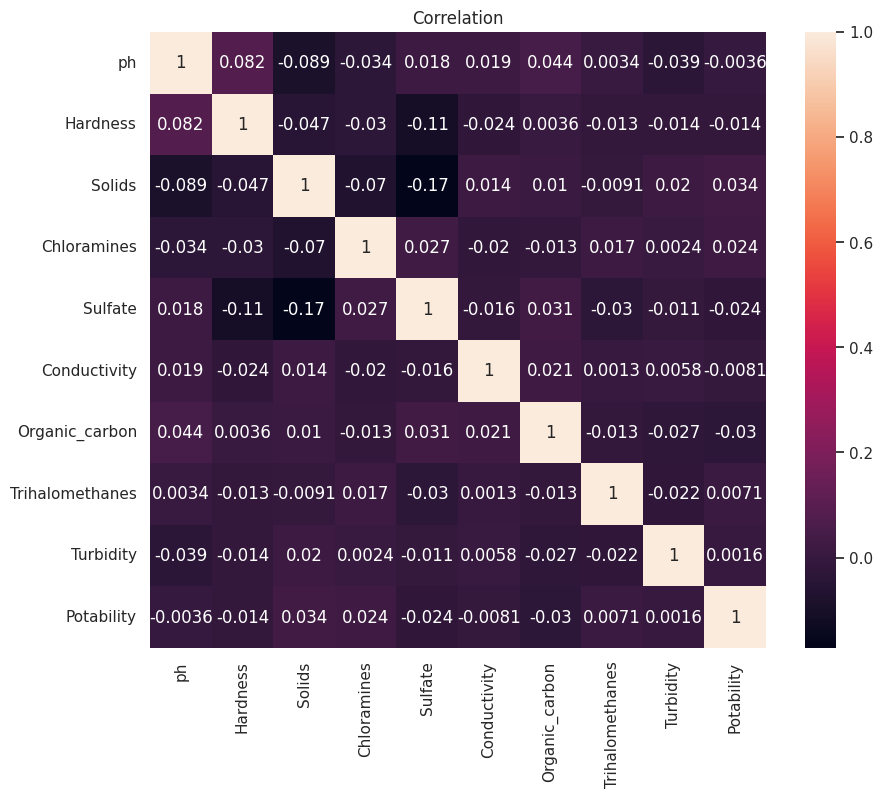

In [ ]:
#Creating a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title('Correlation')
plt.show();

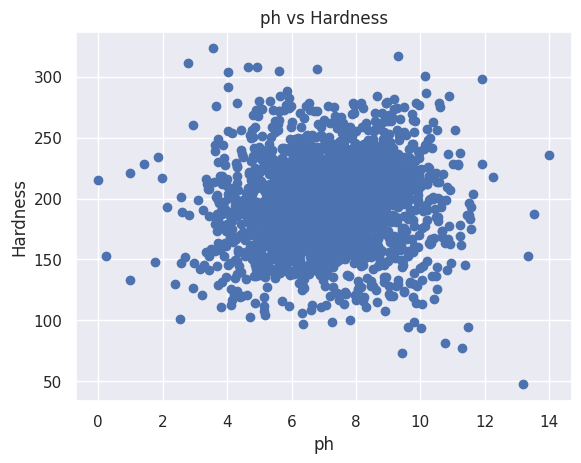

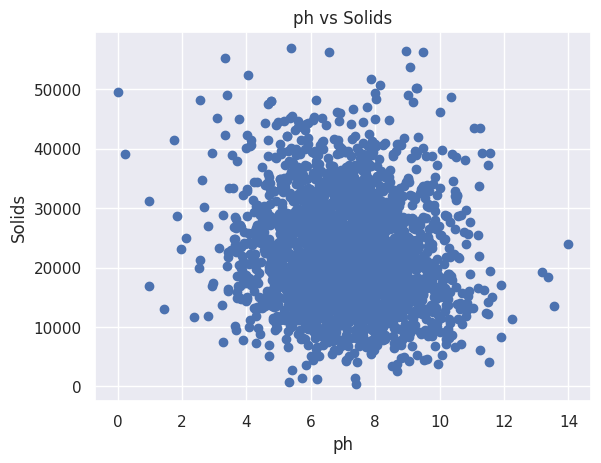

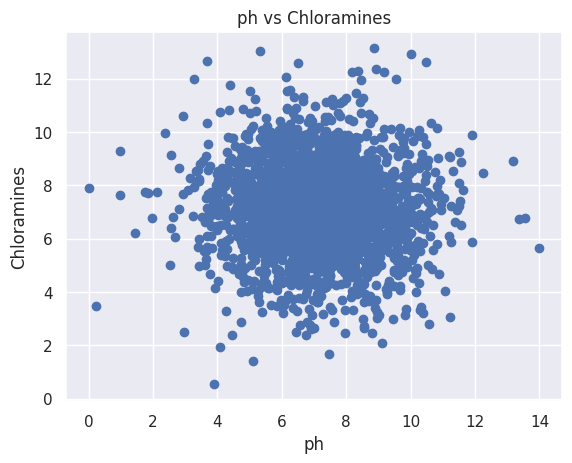

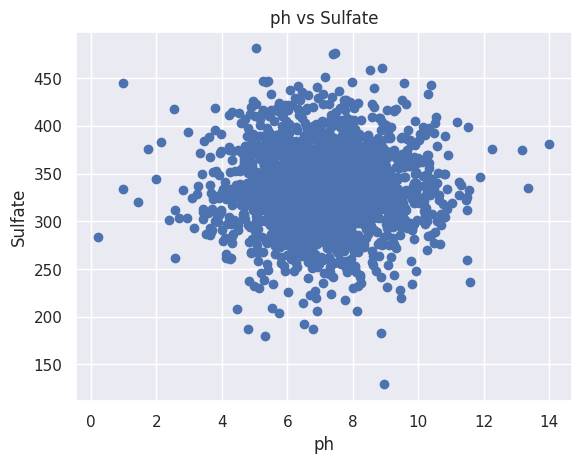

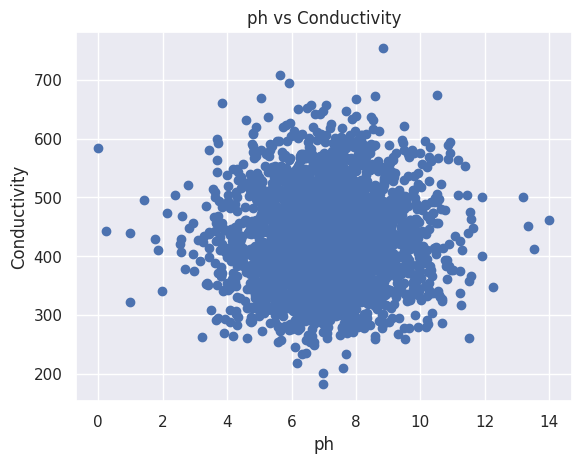

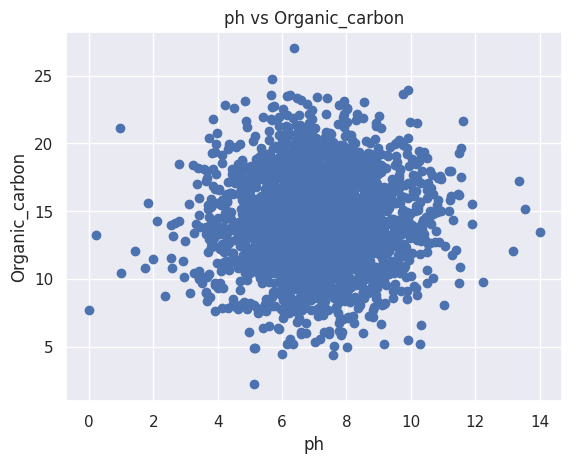

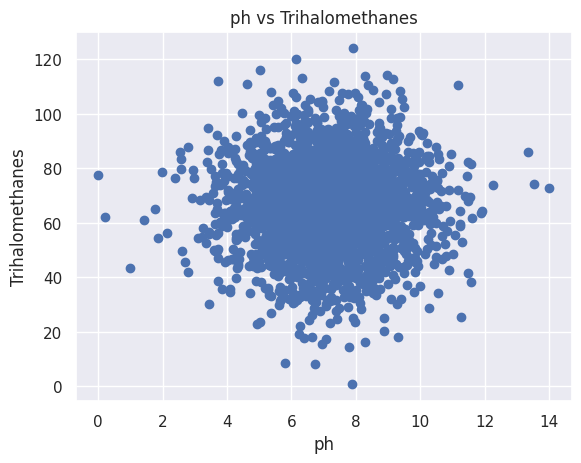

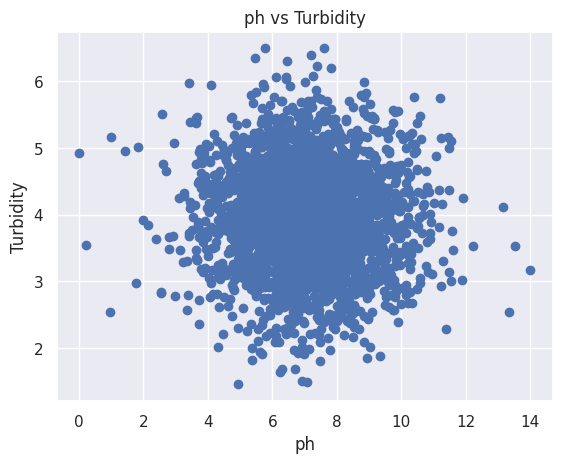

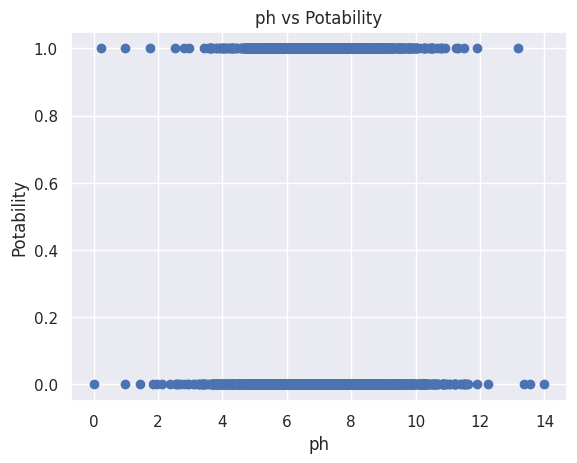

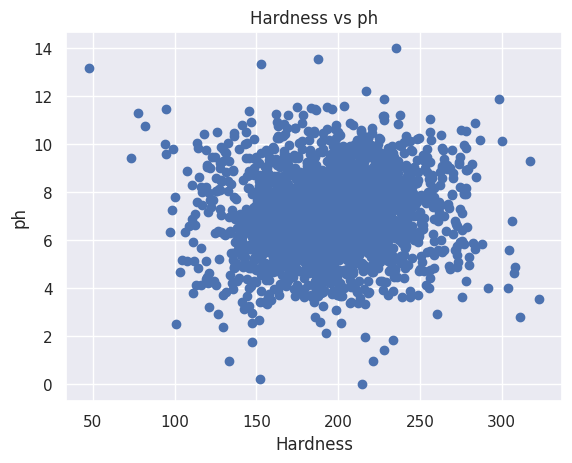

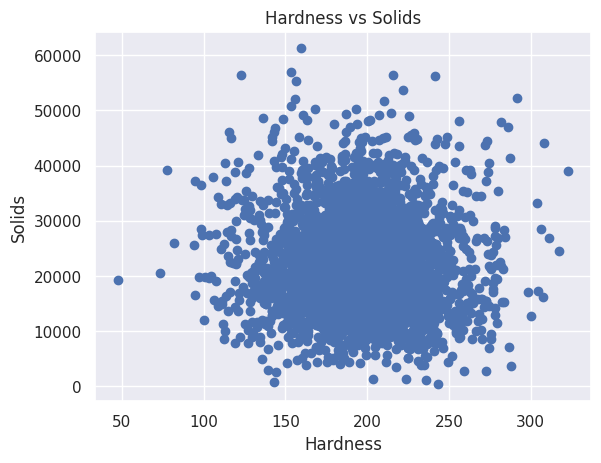

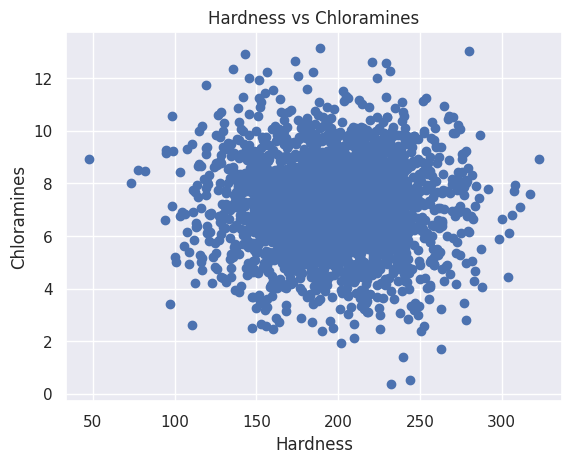

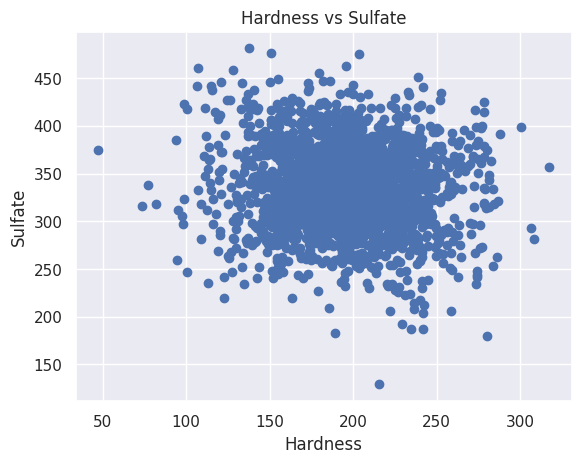

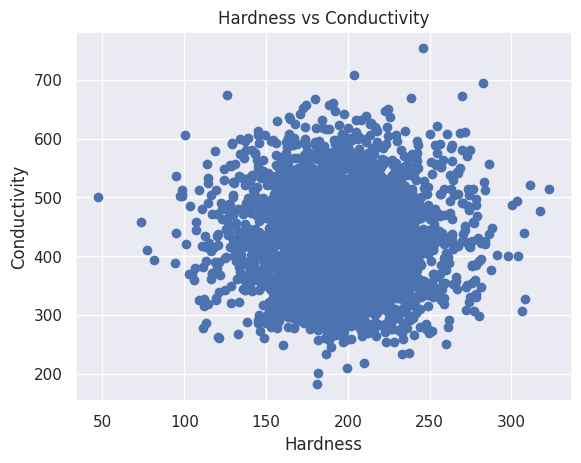

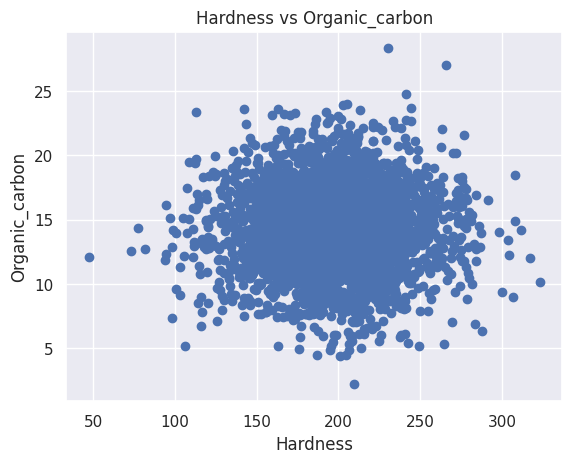

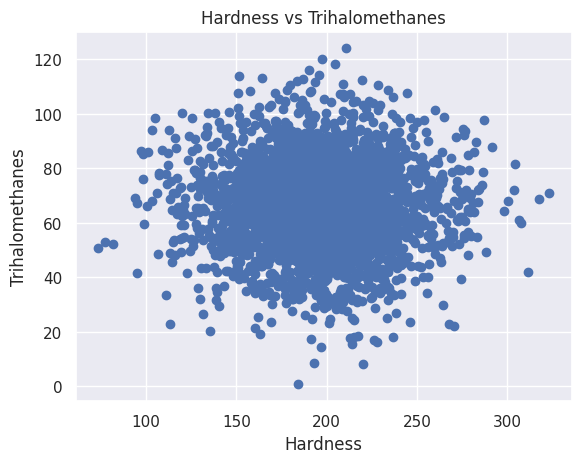

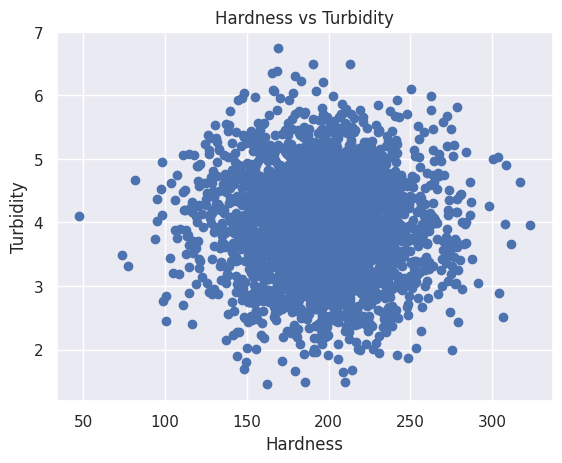

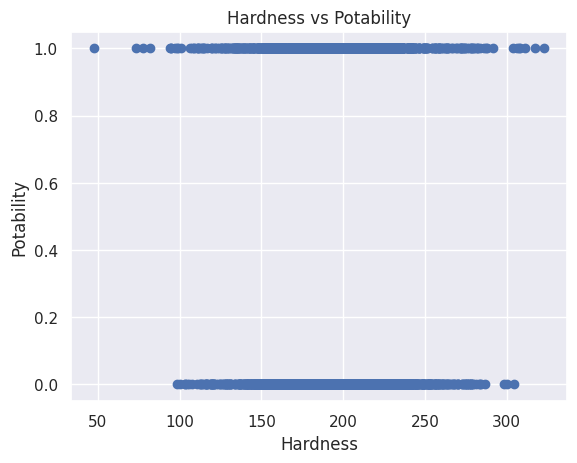

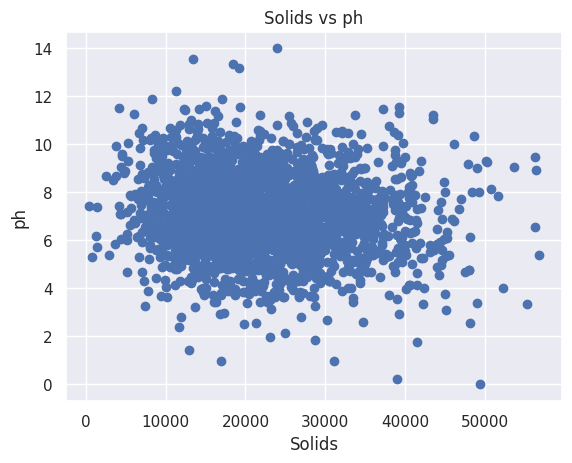

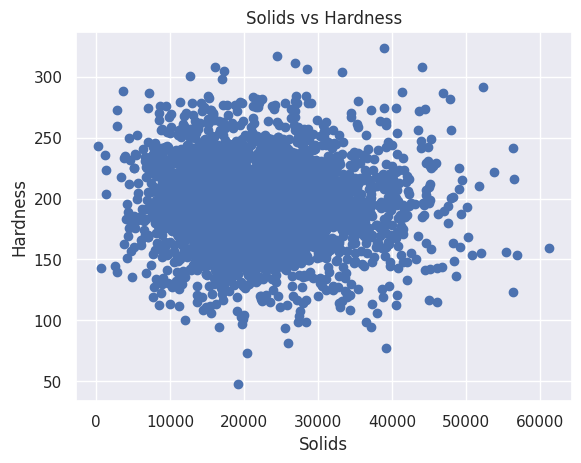

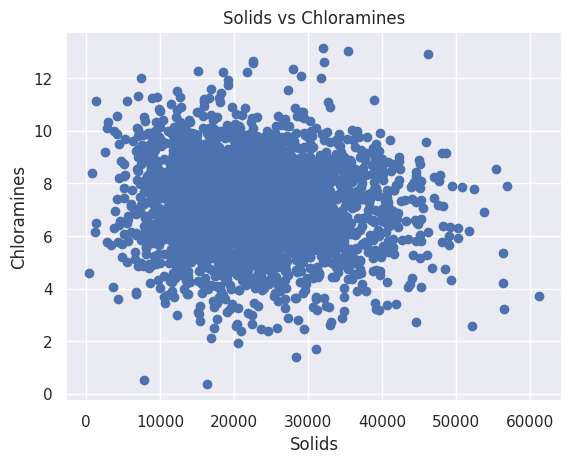

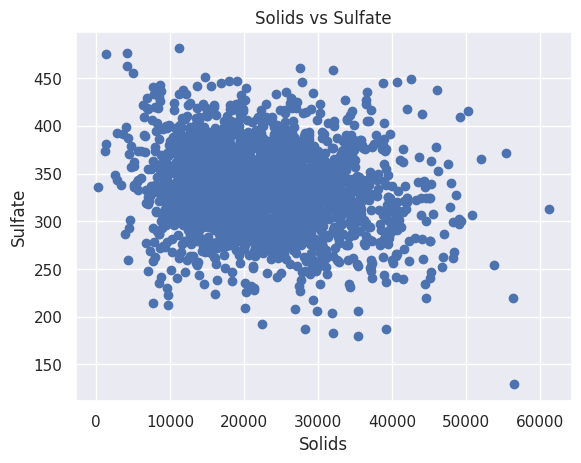

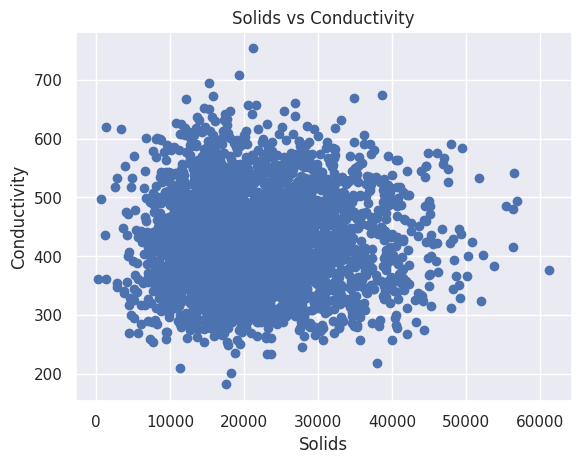

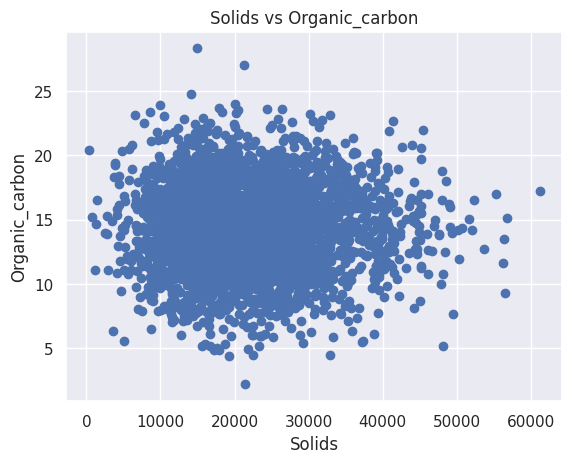

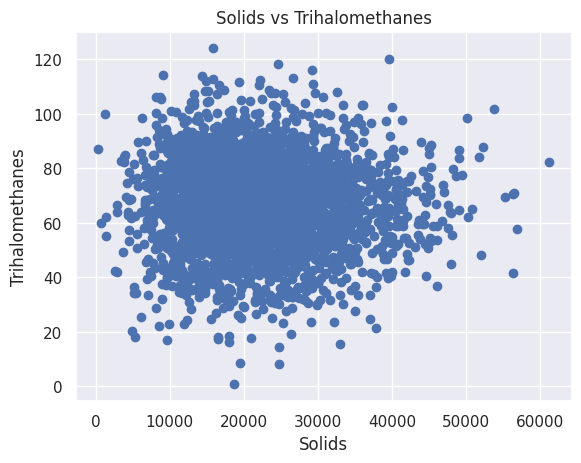

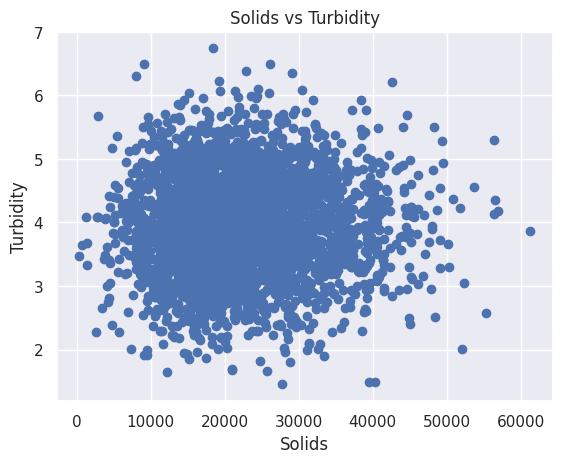

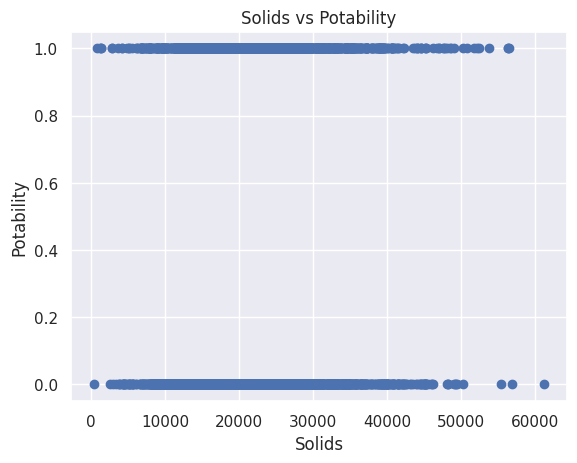

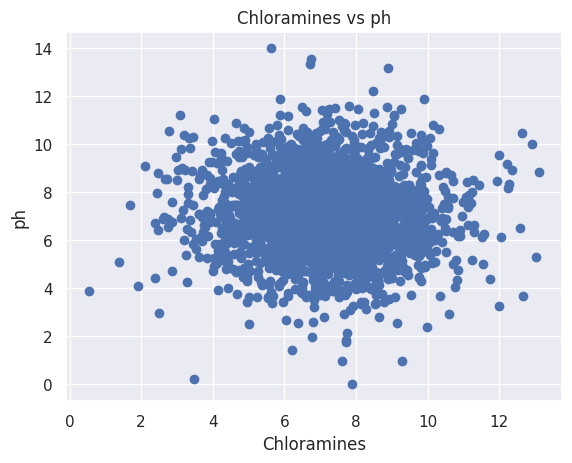

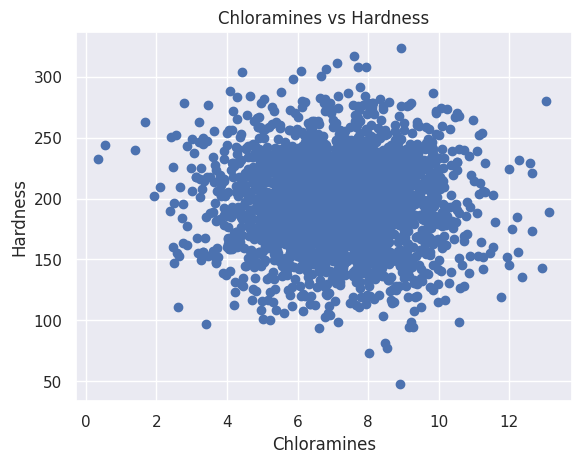

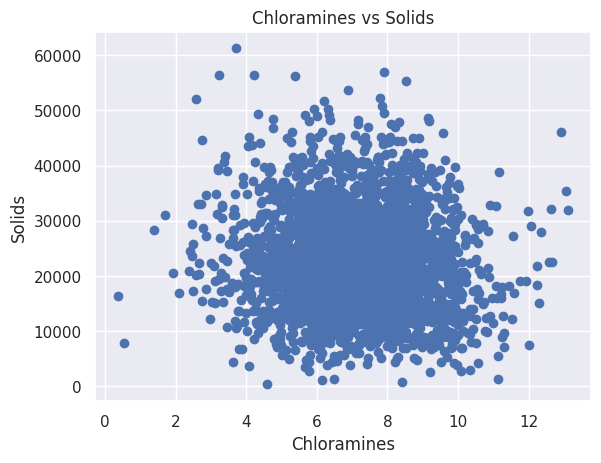

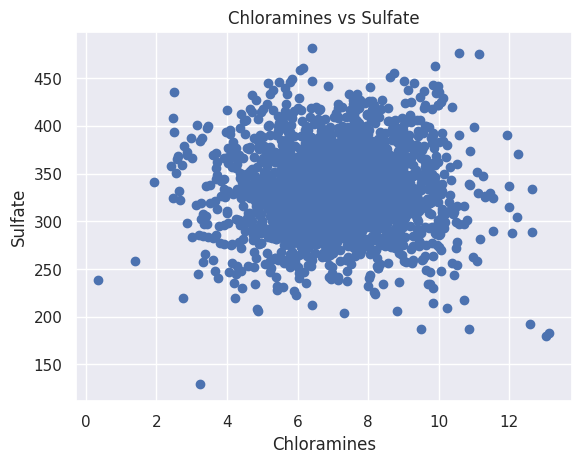

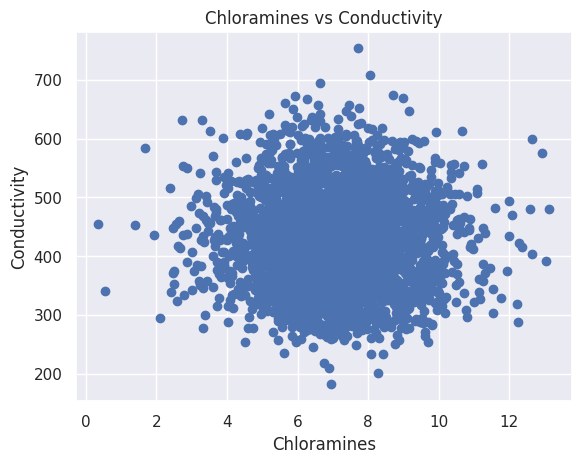

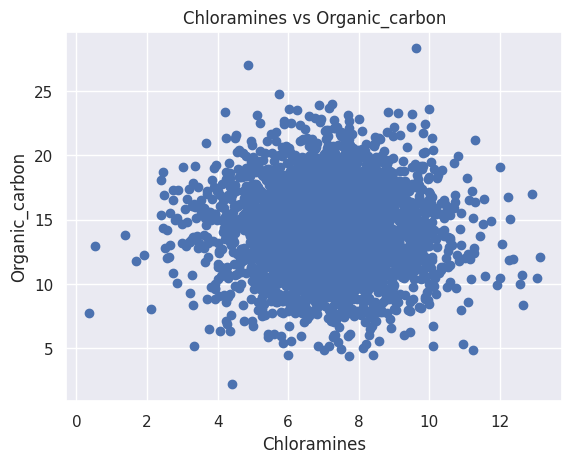

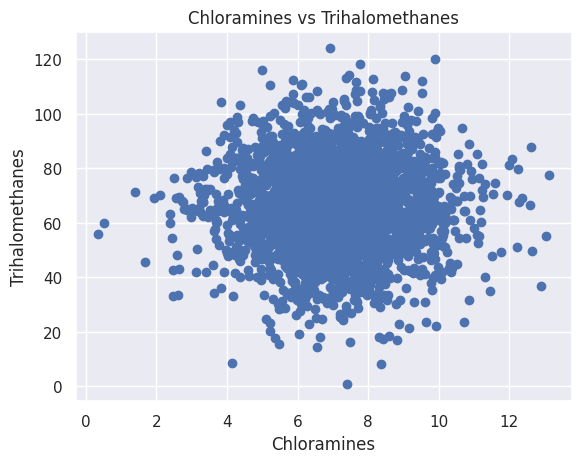

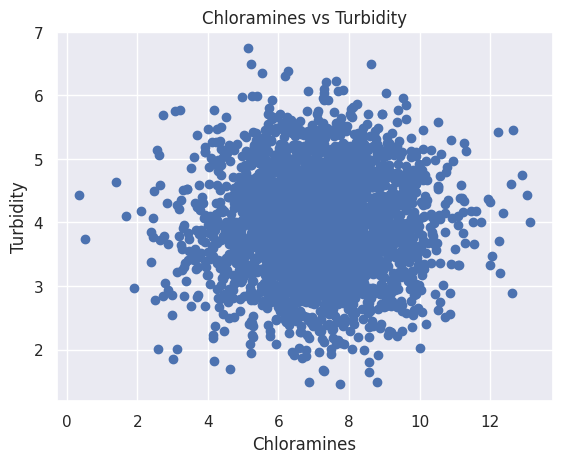

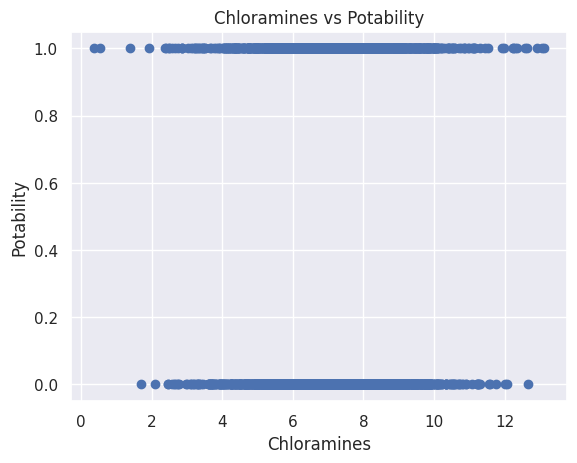

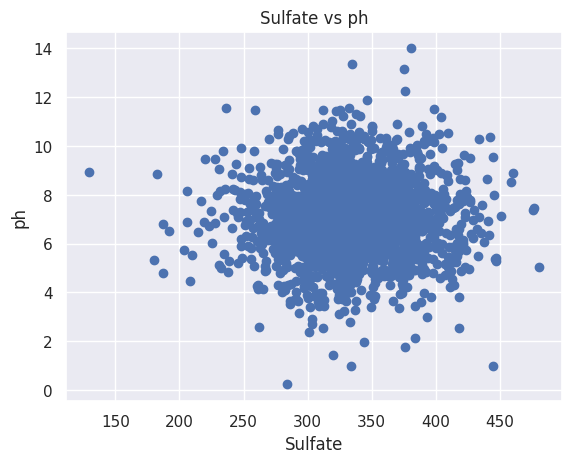

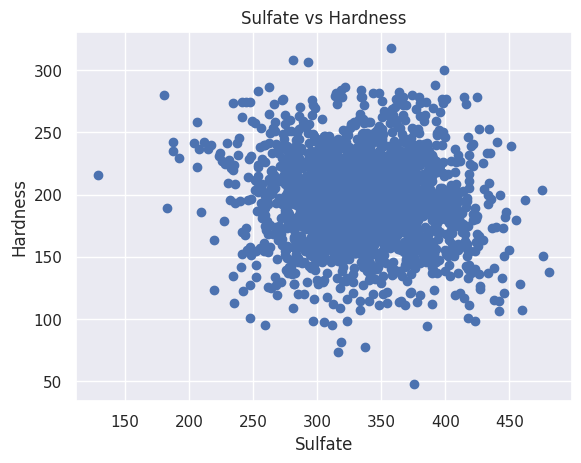

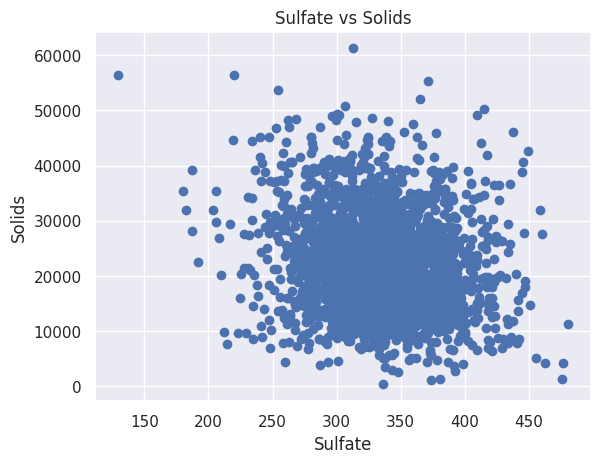

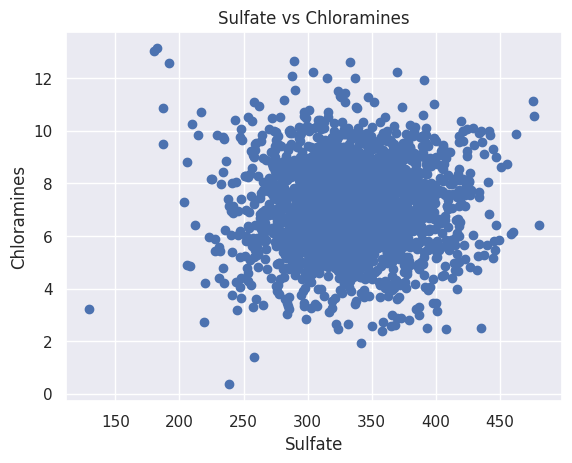

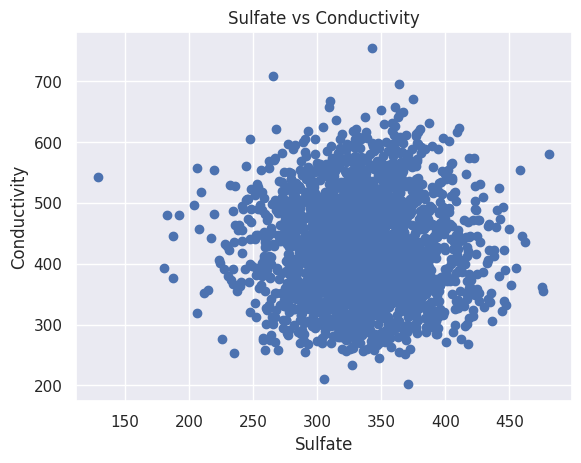

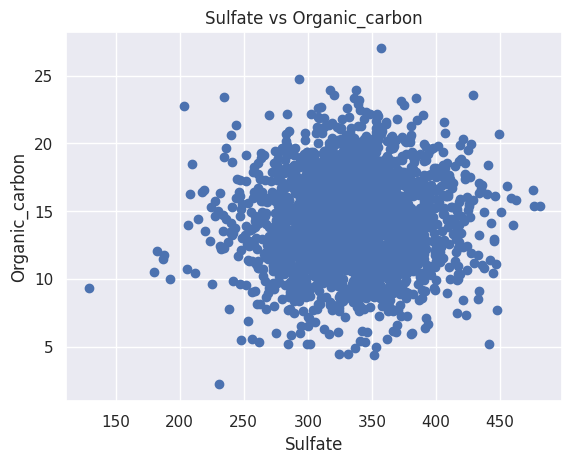

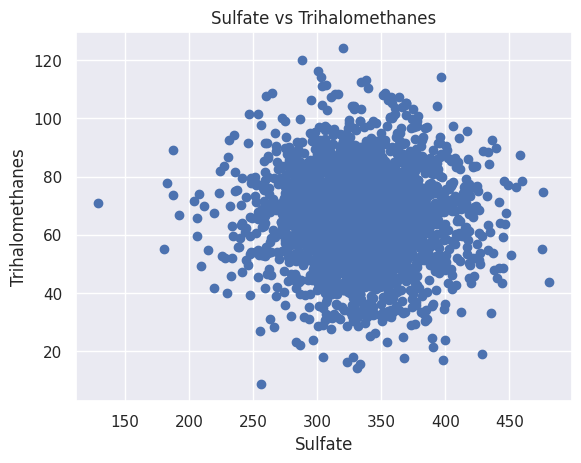

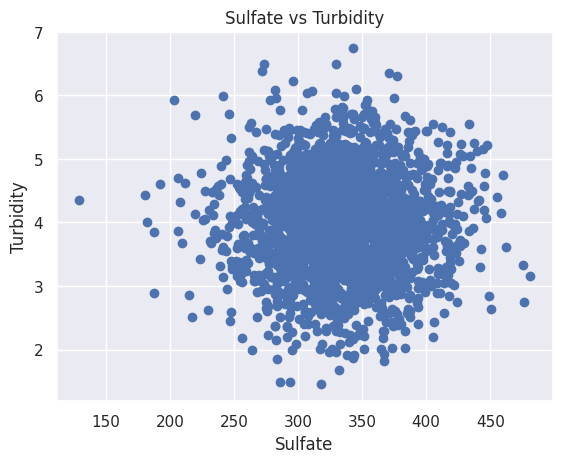

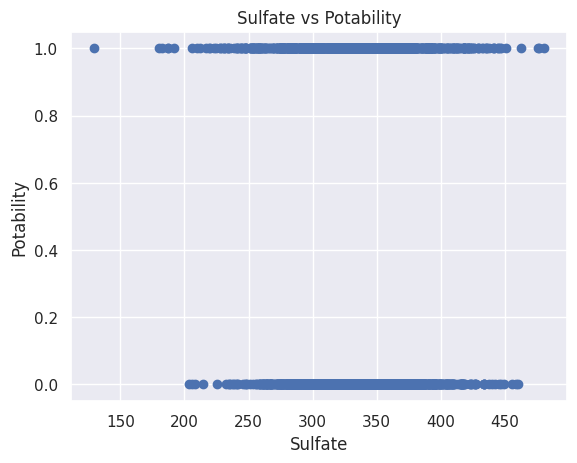

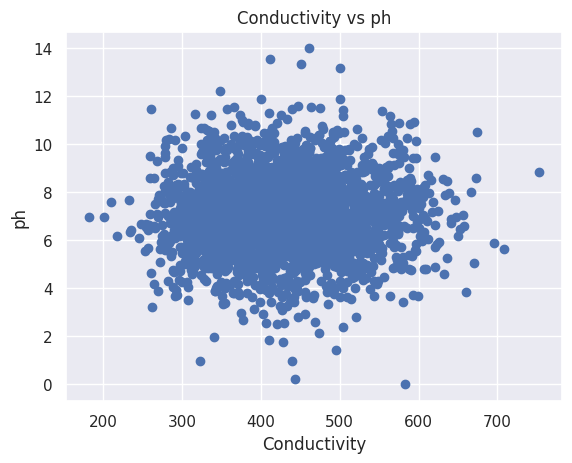

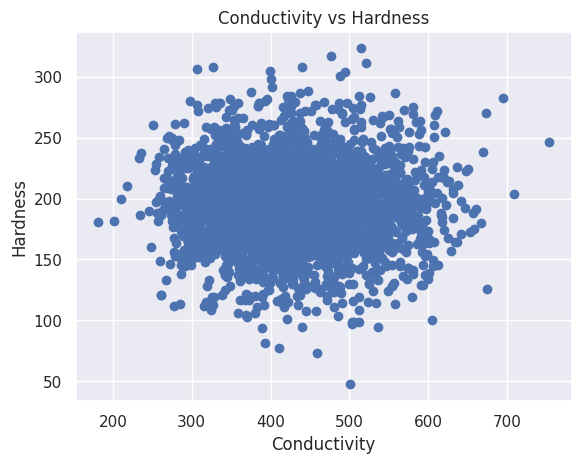

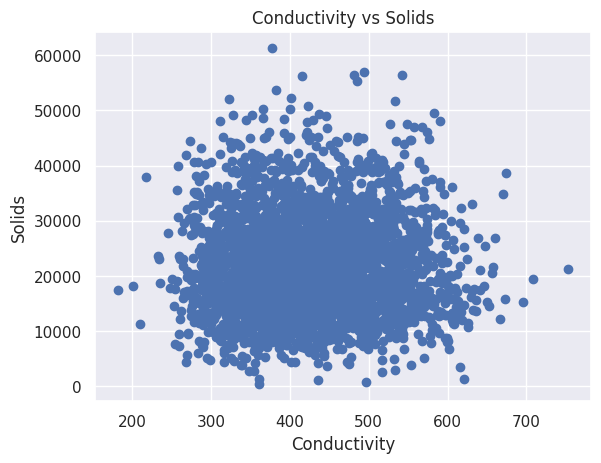

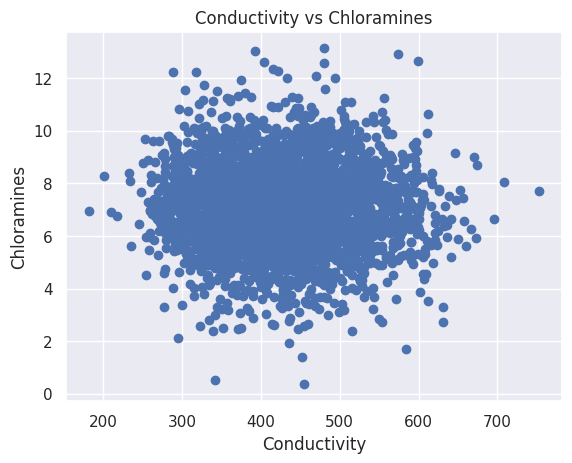

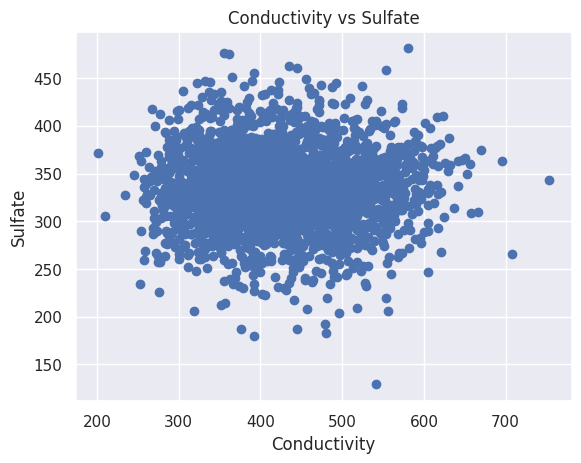

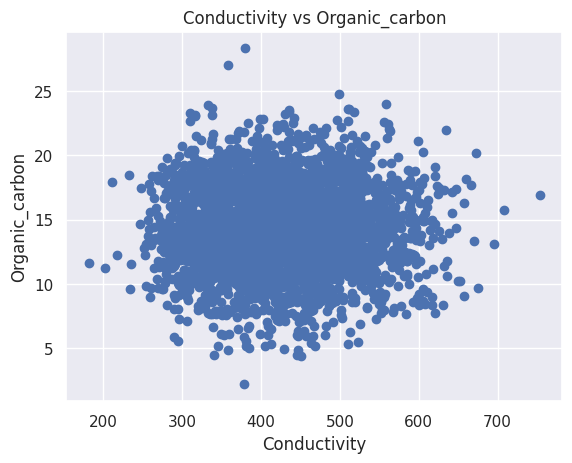

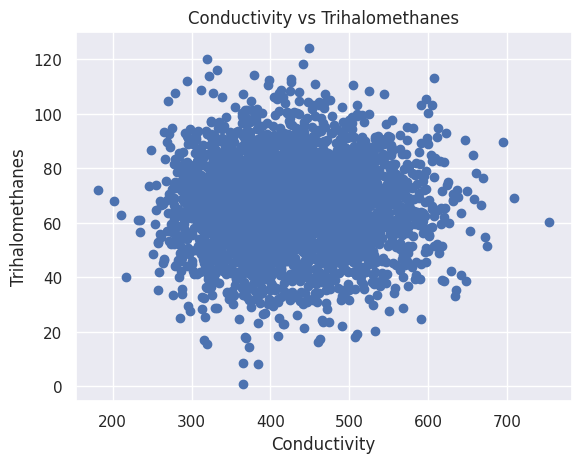

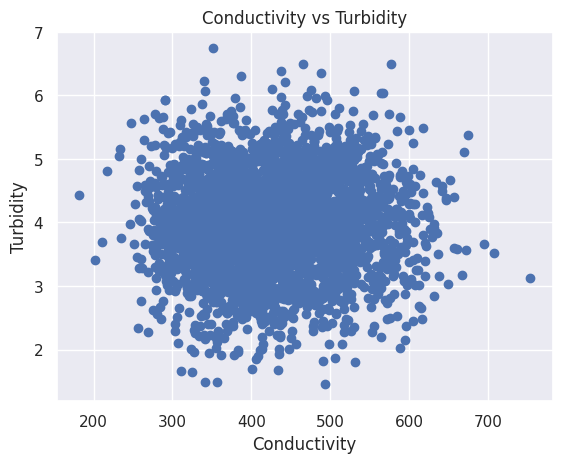

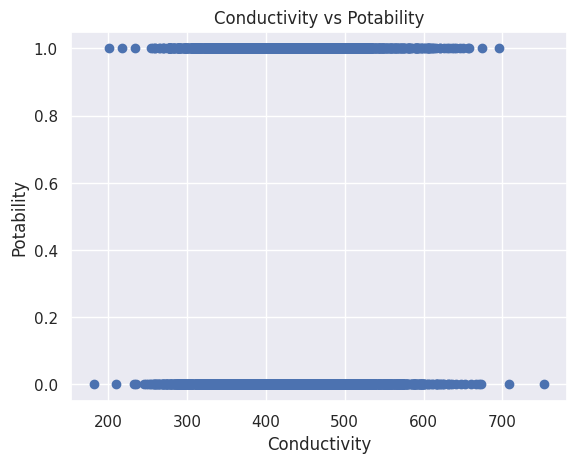

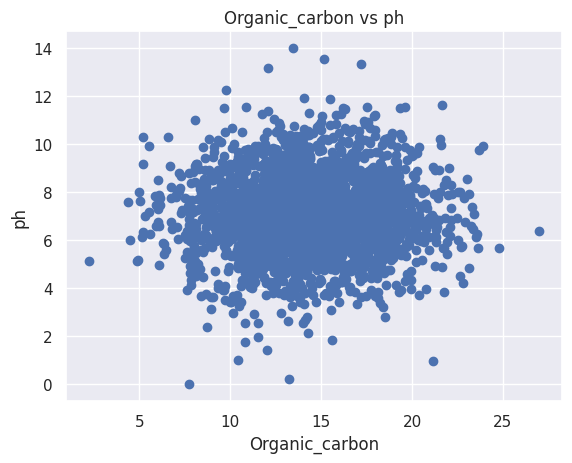

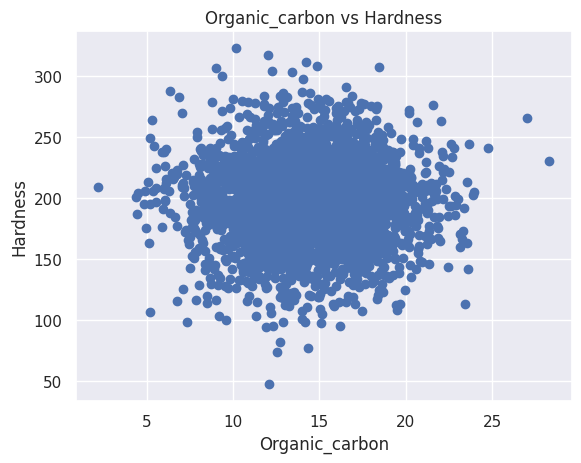

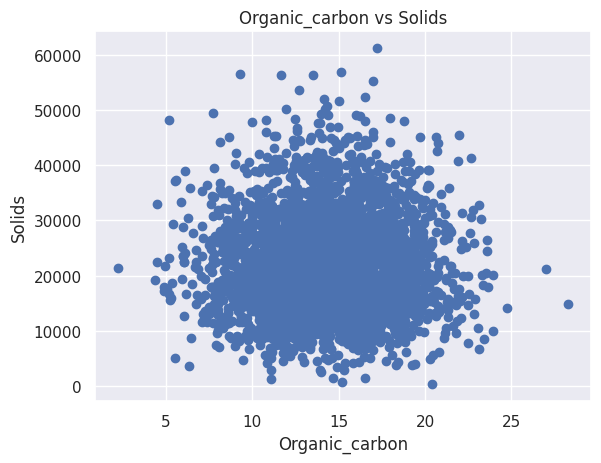

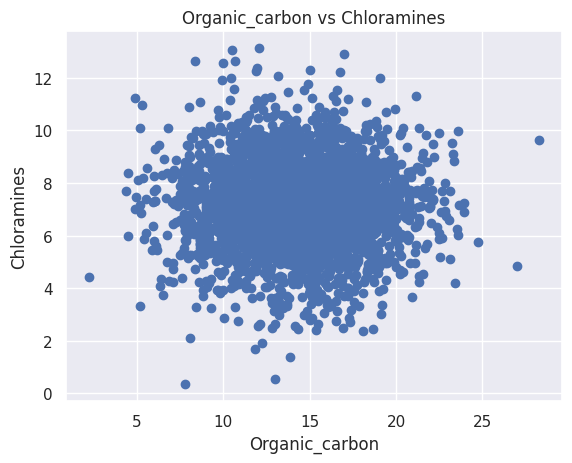

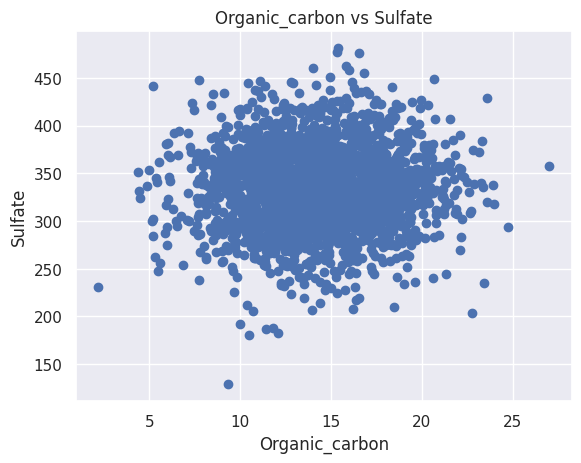

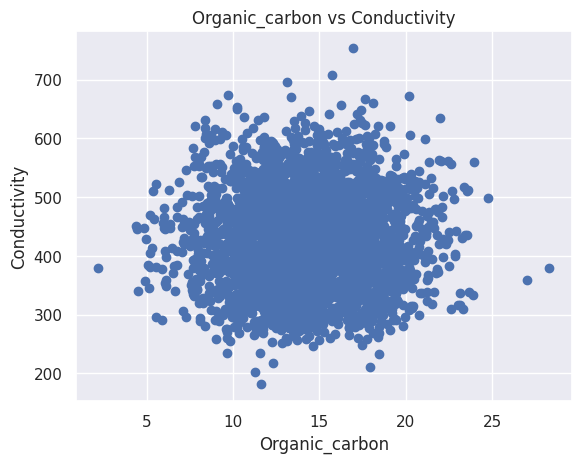

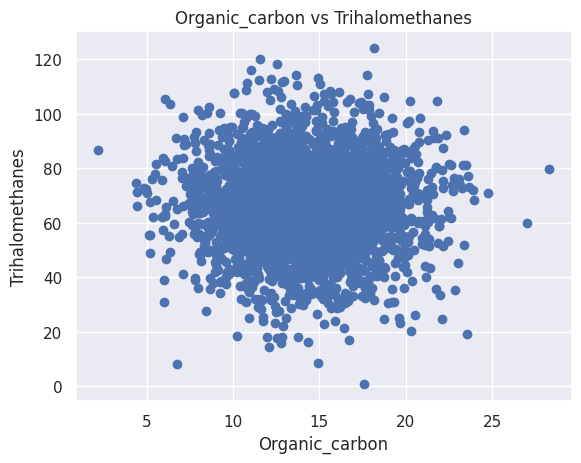

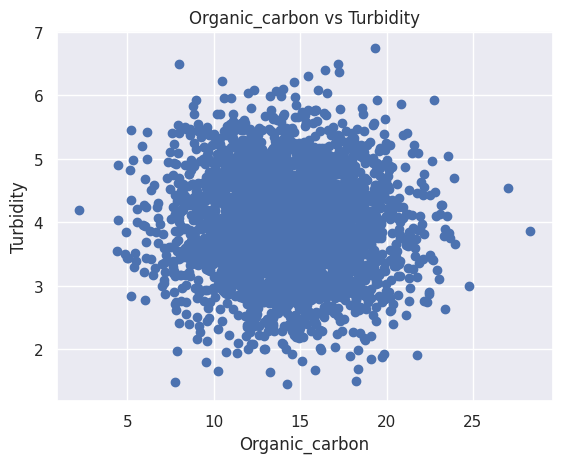

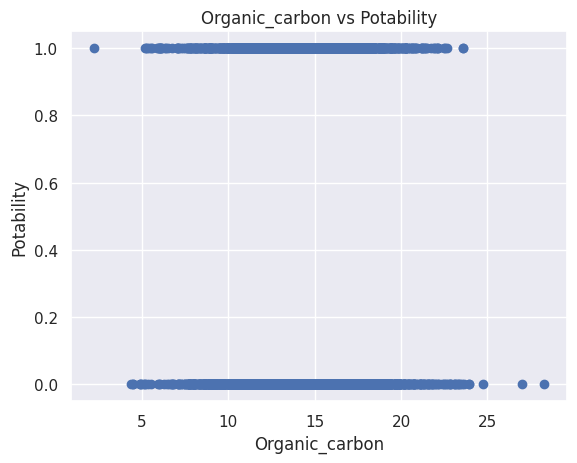

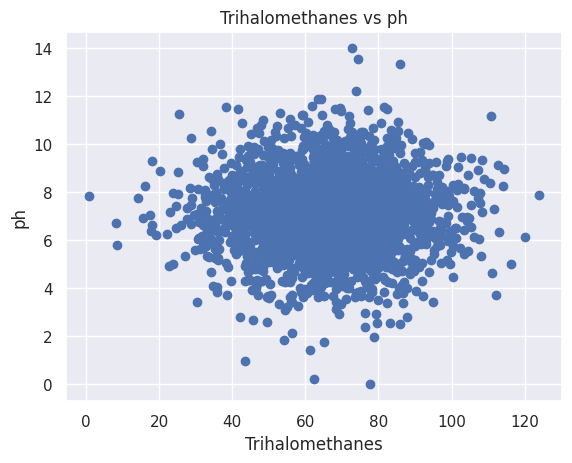

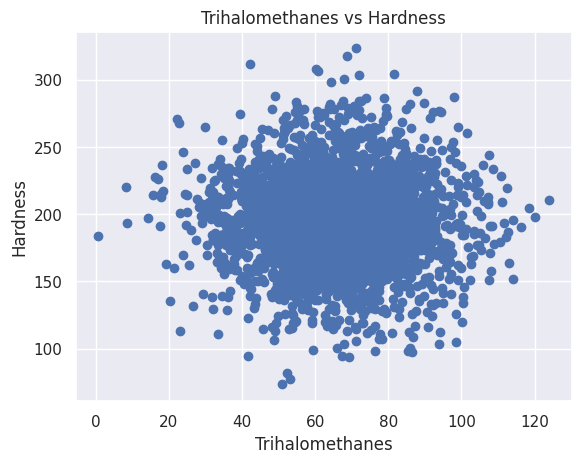

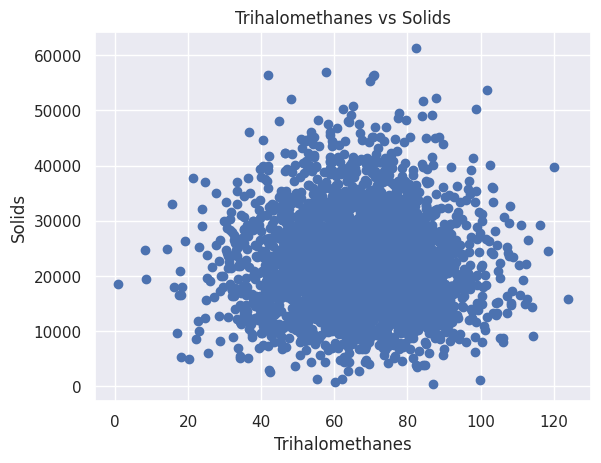

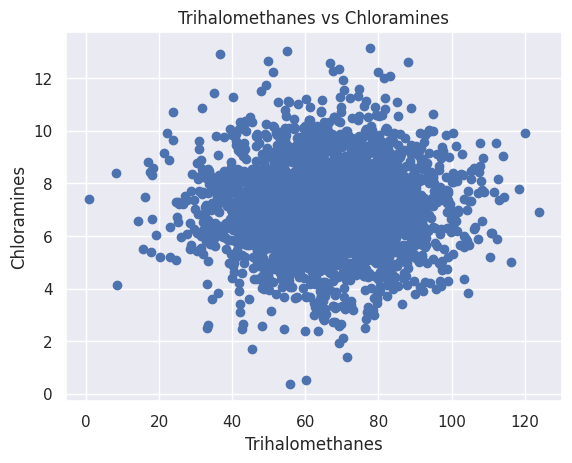

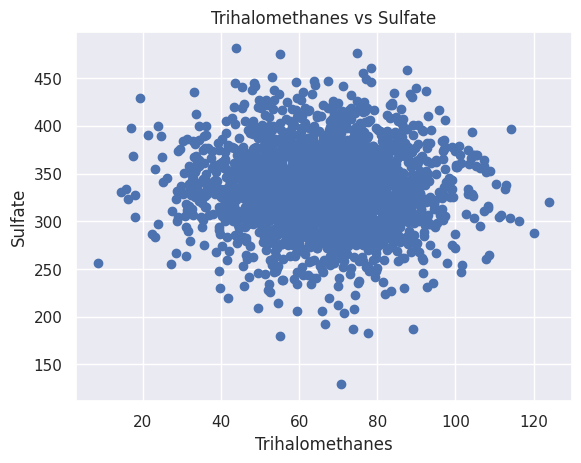

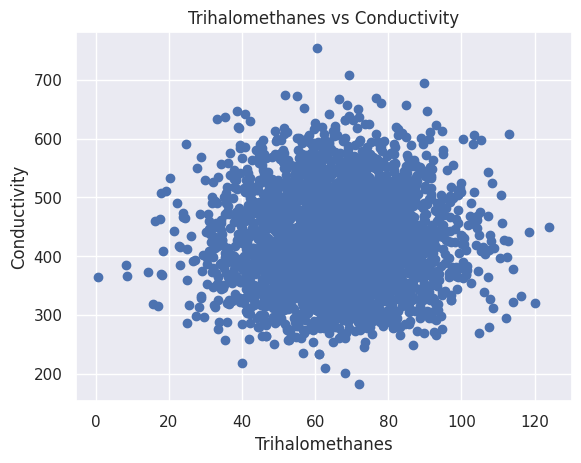

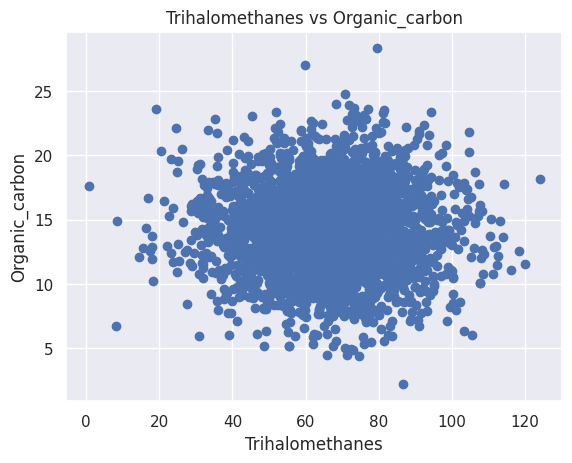

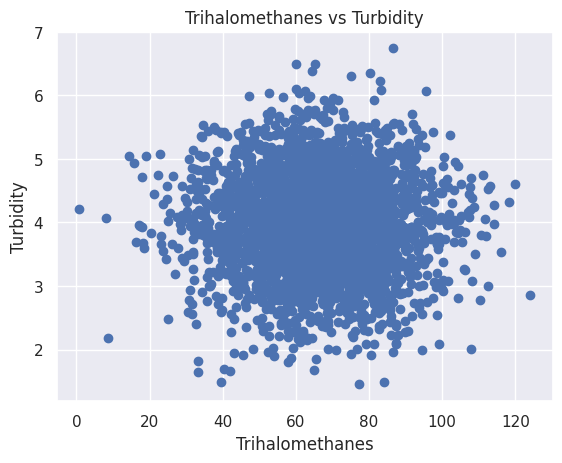

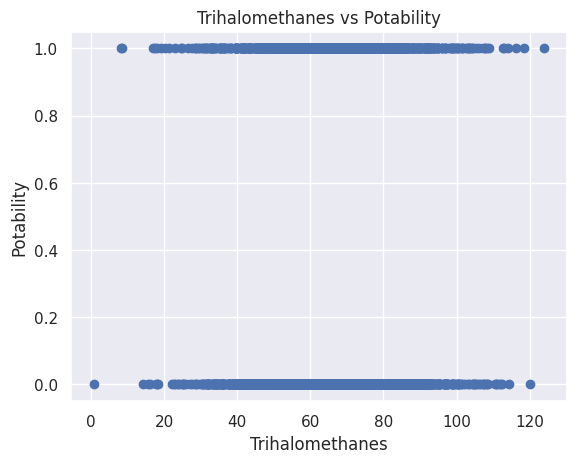

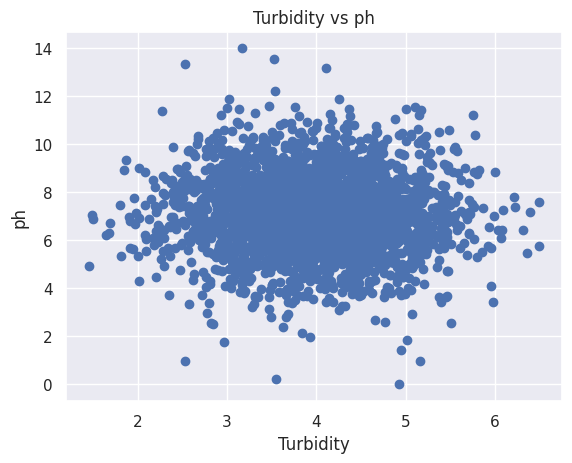

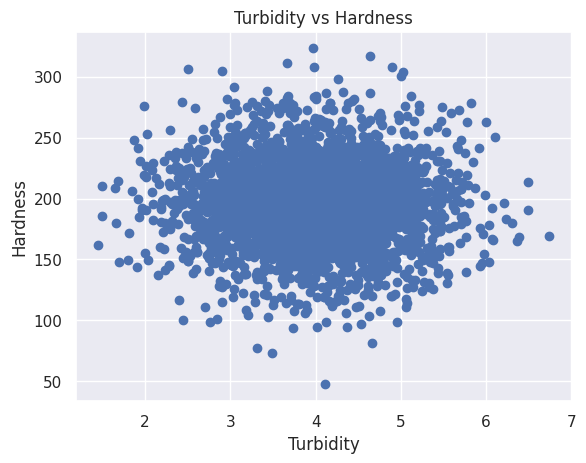

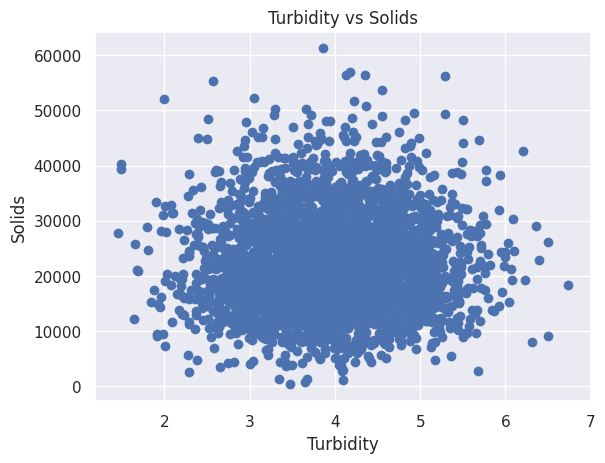

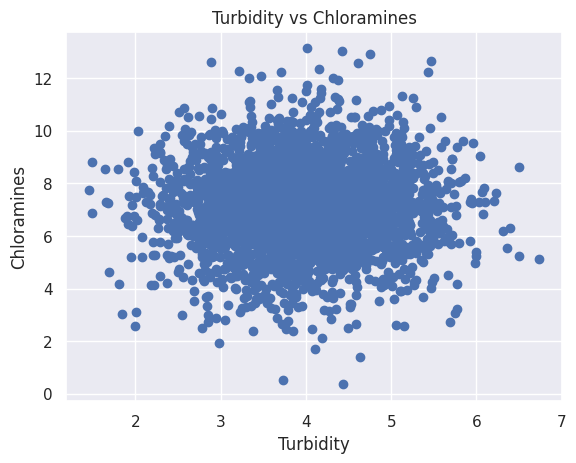

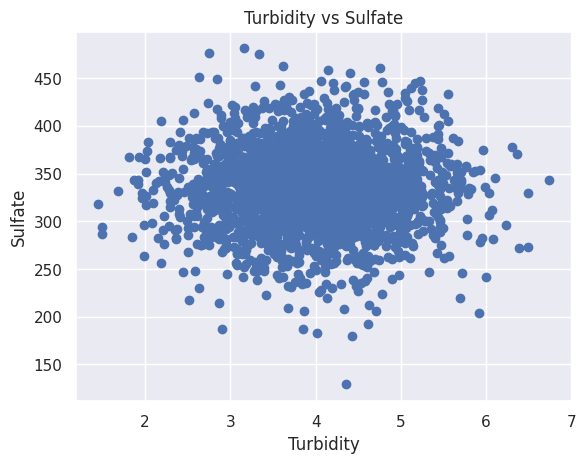

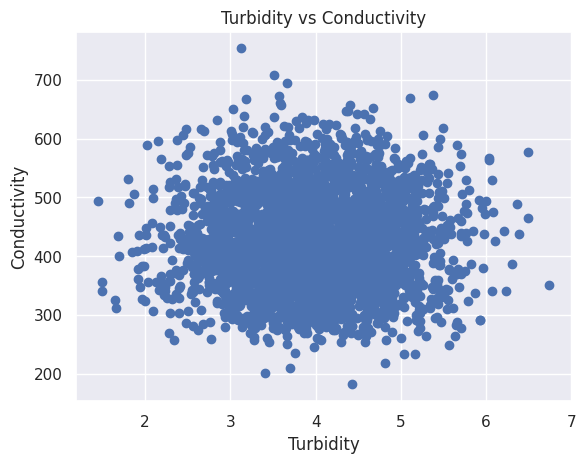

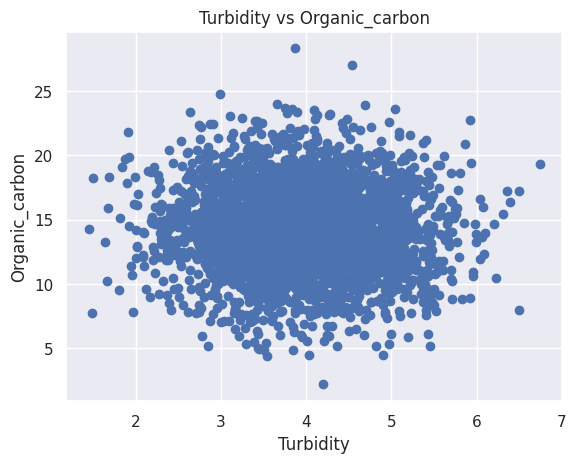

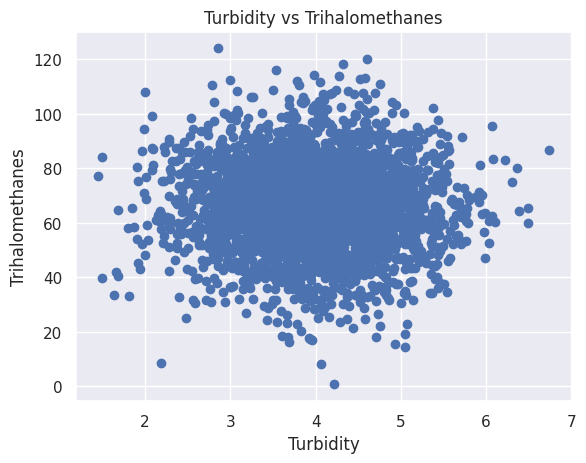

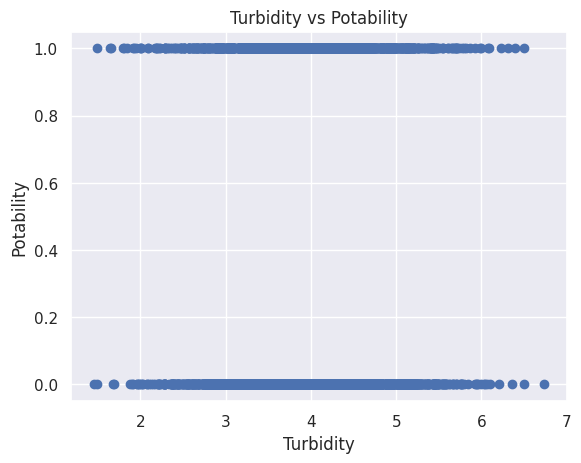

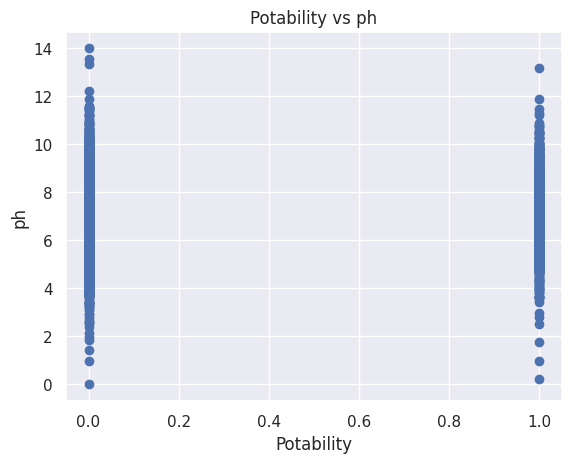

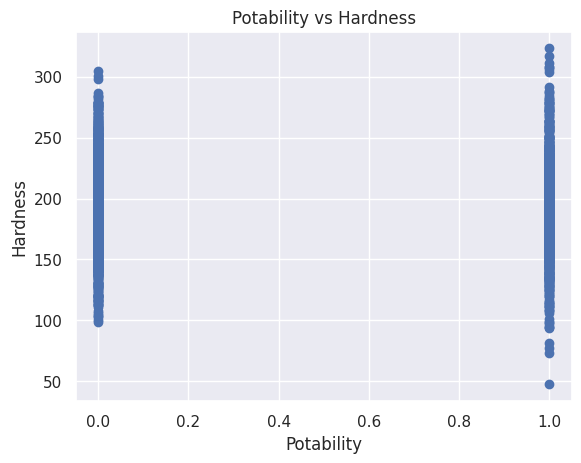

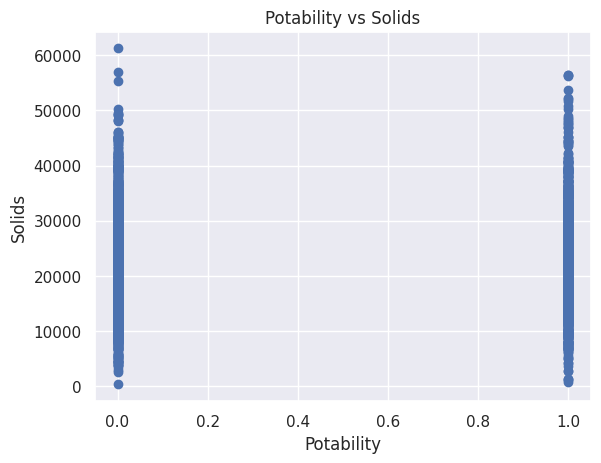

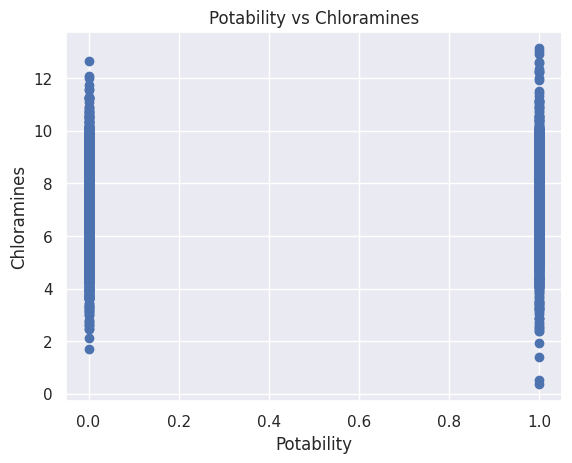

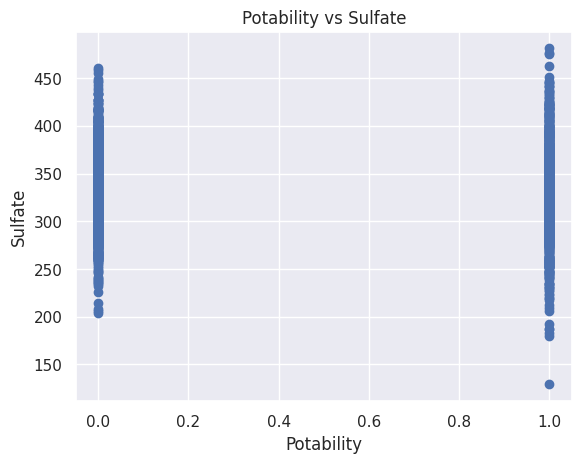

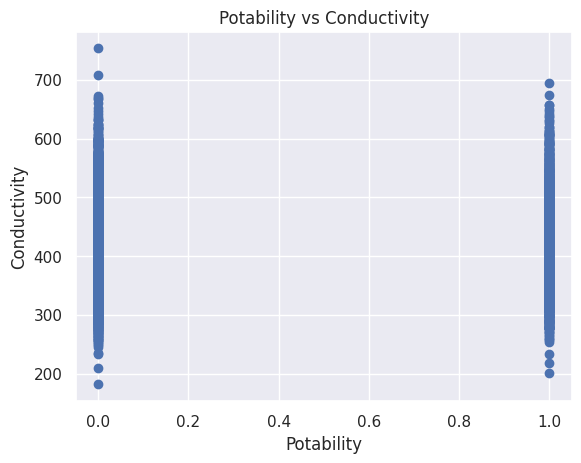

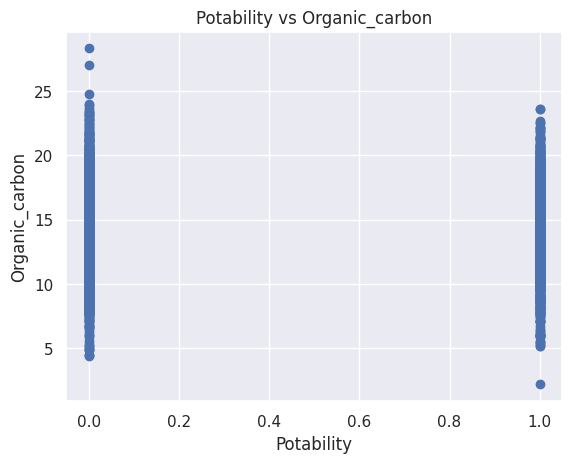

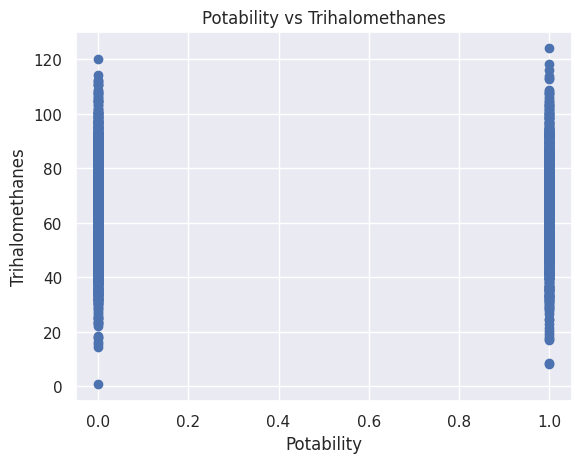

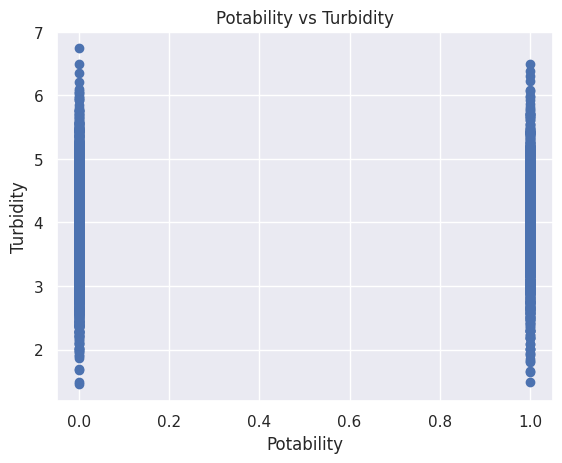

In [ ]:
#Scatter plots
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            plt.scatter(df[col1], df[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'{col1} vs {col2}')
            plt.show();

In [ ]:
#Splitting the dataset into target and features
target = "Potability"
X = df.drop(target, axis=1)
Y = df[target]

In [ ]:
X.shape

(3276, 9)

In [ ]:
#Filling missing values with the mean
X.fillna(X.mean(), inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [ ]:
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:

#from sklearn import train_test_split
from sklearn.model_selection import train_test_split
#trainX, testX = X[:n_train, :], X[n_train:, :]

trainX, testX, trainY, testY = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
# split into train and test

# n_train =  len(X_scaled/80)*100
# trainX, testX = X_scaled[n_train:, :], X_scaled[:n_train, :]
# trainY, testY = Y[n_train:], Y[:n_train]

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)




(2620, 9)
(656, 9)
(2620,)
(656,)


# Define the model

In [ ]:
trainX.shape[1]

9

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Start the training Process

1. **Using adam optimizer on early stopping**

Train: 0.718, Test: 0.675


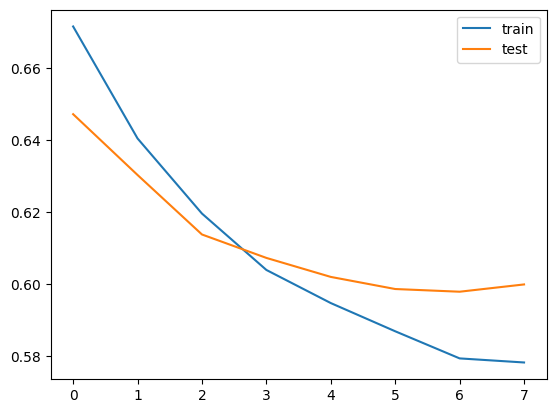

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

es = EarlyStopping()

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**2. Comparing how it performs without using early stopping**

Streaming output truncated to the last 5000 lines.
82/82 [==============================] - 0s 3ms/step - loss: 5.6908e-04 - accuracy: 1.0000 - val_loss: 5.1734 - val_accuracy: 0.6037
Epoch 1502/4000
82/82 [==============================] - 0s 4ms/step - loss: 5.6916e-04 - accuracy: 1.0000 - val_loss: 5.1737 - val_accuracy: 0.6037
Epoch 1503/4000
82/82 [==============================] - 0s 4ms/step - loss: 5.6908e-04 - accuracy: 1.0000 - val_loss: 5.1734 - val_accuracy: 0.6037
Epoch 1504/4000
82/82 [==============================] - 0s 4ms/step - loss: 5.6881e-04 - accuracy: 1.0000 - val_loss: 5.1738 - val_accuracy: 0.6037
Epoch 1505/4000
82/82 [==============================] - 0s 3ms/step - loss: 5.6879e-04 - accuracy: 1.0000 - val_loss: 5.1743 - val_accuracy: 0.6037
Epoch 1506/4000
82/82 [==============================] - 0s 3ms/step - loss: 5.6843e-04 - accuracy: 1.0000 - val_loss: 5.1752 - val_accuracy: 0.6037
Epoch 1507/4000
82/82 [==============================] - 0s 4ms/step - 

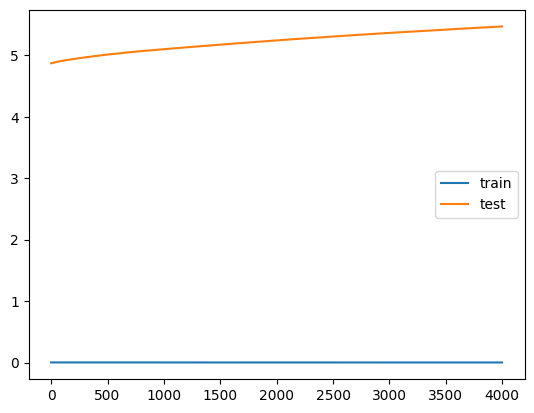

In [ ]:

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=1)#callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**3. Using adam optimizer on L1**

Train: 0.703, Test: 0.684


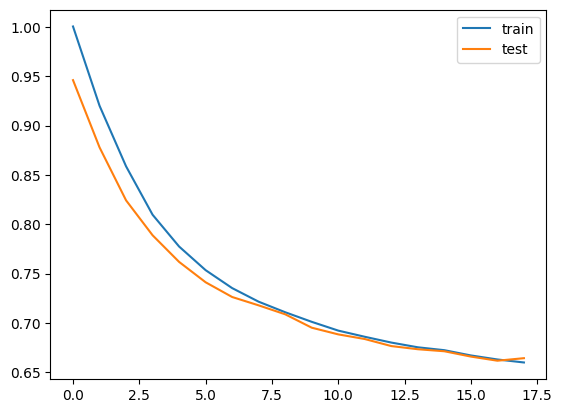

In [ ]:
from keras.regularizers import l1


model_l1 = Sequential()
model_l1.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l1(0.001)))
model_l1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model_l1.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))

#Compile the model
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l1.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l1.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l1.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**4. Using adam optimizer on L2**

Train: 0.706, Test: 0.681


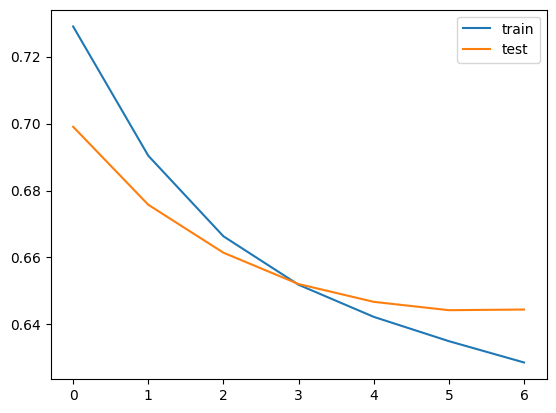

In [ ]:
from keras.regularizers import l2


model_l2 = Sequential()
model_l2.add(Dense(64, activation='relu', input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.001)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model_l2.evaluate(trainX, trainY, verbose=0)
_, test_acc = model_l2.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Compare the output without Early stopping

**5. Using SGD optimizer on L1**

Train: 0.714, Test: 0.681


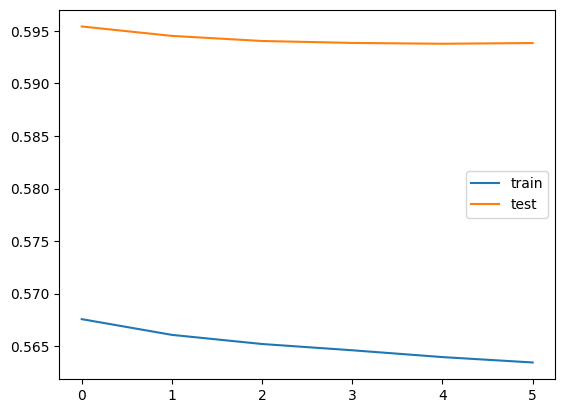

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

es = EarlyStopping()

#Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
loss, accu = model.evaluate(X, Y)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accu:.3f}')

103/103 [==============================] - 0s 2ms/step - loss: 300.7995 - accuracy: 0.3938
Test loss: 300.799
Test accuracy: 0.394


In [ ]:
pip install fastapi "uvicorn[standard]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import keras


In [ ]:
with open('potability_model.keras', 'wb') as file:
    keras.dump(model_l1, file)

In [ ]:
import asyncio
import uvicorn
from typing import Annotated
from fastapi import FastAPI, Depends, HTTPException, status, Path
from pydantic import BaseModel, Field

In [ ]:
from fastapi import FastAPI, Depends
from pydantic import BaseModel, Field
import numpy as np
import tensorflow as tf

# Load the machine learning model
model = tf.keras.models.load_model('./potability_model.keras')

# FastAPI decorator to create the app object
app = FastAPI()

# Define the Pydantic model for request body


class InputData(BaseModel):
    ph: float = Field(..., gt=0, lt=14, description="pH value")
    Hardness: float = Field(..., gt=0, lt=300, description="Hardness value")
    Solids: float = Field(..., gt=0, lt=200000, description="Solids value")
    Chloramines: float = Field(..., gt=0, lt=30,
                               description="Chloramines value")
    Sulfate: float = Field(..., gt=0, lt=500, description="Sulfate value")
    Conductivity: float = Field(..., gt=0, lt=500,
                                description="Conductivity value")
    Organic_carbon: float = Field(..., gt=0, lt=30,
                                  description="Organic carbon value")
    Trihalomethanes: float = Field(..., gt=0,
                                   lt=200, description="Trihalomethanes value")
    Turbidity: float = Field(..., gt=0, lt=200, description="Turbidity value")

# Define the root route


@app.get("/")
def root():
    return {"message": "Hello World"}

# Define the predict route


@app.post("/predict")
def predict(data: InputData = Depends()):
    # Extract features from input data
    features = np.array([[
        data.ph, data.Hardness, data.Solids, data.Chloramines, data.Sulfate,
        data.Conductivity, data.Organic_carbon, data.Trihalomethanes, data.Turbidity
    ]]).reshape(1, -1)

    # Make prediction
    prediction = model.predict(features)[0]

    # Assuming the prediction is a probability, convert it to a binary class
    predicted_class = int(prediction >= 0.5)  # Change this threshold as needed

    # Return prediction
    return {"prediction": predicted_class}


if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)


TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 9], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_5'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
import joblib
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from uvicorn import Config, Server

# Load the trained model
model = joblib.load('potability.pkl')

app = FastAPI()

class WaterRequest(BaseModel):
    ph: float
    Hardness: float
    Solids: float
    Chloramines: float
    Sulfate: float
    Conductivity: float
    Organic_carbon: float
    Trihalomethanes: float
    Turbidity: float

@app.get("/greet")
async def get_greet():
    return {"Message": "Hello"}

@app.get("/", status_code=status.HTTP_200_OK)
async def get_hello():
    return {"hello": "world"}

@app.post('/predict', status_code=status.HTTP_200_OK)
async def make_prediction(water_request: WaterRequest):
    try:
        single_row = [[
            water_request.ph,
            water_request.Hardness,
            water_request.Solids,
            water_request.Chloramines,
            water_request.Sulfate,
            water_request.Conductivity,
            water_request.Organic_carbon,
            water_request.Trihalomethanes,
            water_request.Turbidity]]
        predicted_portability = model.predict(single_row)
        return {"predicted_portability": predicted_portability[0][0]}
    except Exception as e:
        raise HTTPException(status_code=500, detail="Something went wrong.")

if __name__ == "__main__":
    config = Config(app)
    server = Server(config)
    await server.serve()

INFO:     Started server process [253]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
